In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import genfromtxt
from tensorflow import keras

In [4]:
raw_train = genfromtxt('./digits_train.csv', delimiter=',')
raw_test = genfromtxt('./digits_test.csv', delimiter=',')

In [9]:
raw_train = raw_train[1:]

In [20]:
np.random.shuffle(raw_train)

In [22]:
X_train = raw_train[0:29400]
X_test = raw_train[29401:]

In [31]:
y_train = X_train[:,0]
y_test = X_test[:,0]
X_train = X_train[:,1:]
X_test = X_test[:,1:]

In [39]:
train_images = []
test_images = []
for i in range(len(X_train)):
    train_images.append(X_train[i].reshape((28,28)))
    
for i in range(len(X_test)):
    test_images.append(X_test[i].reshape((28,28)))

In [56]:
X_train = X_train/255.0
X_test = X_test/255.0

In [57]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>=0.99):
            print("\nReached {}% accuracy so cancelling training!\n".format(logs.get('acc')*100))
            self.model.stop_training = True

In [62]:
callback = myCallback()
model = keras.models.Sequential()
model.add(keras.layers.Dense(784))
model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
29400/29400 [==============================] - 6s 212us/sample - loss: 0.2720 - acc: 0.9172
Epoch 2/10
29400/29400 [==============================] - 6s 217us/sample - loss: 0.1545 - acc: 0.9529
Epoch 3/10
29400/29400 [==============================] - 7s 227us/sample - loss: 0.1241 - acc: 0.9631
Epoch 4/10
29400/29400 [==============================] - 6s 213us/sample - loss: 0.1115 - acc: 0.9672
Epoch 5/10
29400/29400 [==============================] - 6s 208us/sample - loss: 0.1010 - acc: 0.9710
Epoch 6/10
29400/29400 [==============================] - 7s 221us/sample - loss: 0.0922 - acc: 0.9738
Epoch 7/10
29400/29400 [==============================] - 6s 200us/sample - loss: 0.0840 - acc: 0.9749
Epoch 8/10
29400/29400 [==============================] - 6s 202us/sample - loss: 0.0832 - acc: 0.9769
Epoch 9/10
29400/29400 [==============================] - 6s 201us/sample - loss: 0.0792 - acc: 0.9790
Epoch 10/10
29400/29400 [==============================] - 6s 211us/sampl

In [63]:
model.evaluate(X_test, y_test)

12599/12599 [==============================] - 1s 81us/sample - loss: 0.2214 - acc: 0.9649


[0.2213929116948225, 0.96491784]

9.0


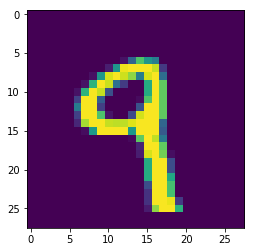

In [55]:
plt.imshow(train_images[13000])
print(y_train[13000])